In [4]:
import json 
import numpy as np 
import pandas as pd 
from textblob import TextBlob
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import os 
from glob import glob 
import re
import preprocessor as tp
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osmanmamun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osmanmamun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('../data/raw/training.1600000.processed.noemoticon.csv', encoding='latin1', header=None)

In [6]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
#df.set_index('id', inplace=True)
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [15]:
df['text'] = df['text'].apply(lambda x: re.sub(r'#(\w+)', r'\1', x))

In [16]:
# Removal of @mentions, RT's, HTTPs etc. 
tp.set_options(tp.OPT.URL, tp.OPT.EMOJI, tp.OPT.MENTION, tp.OPT.NUMBER) 
df['text'] = df['text'].apply(tp.clean)

In [17]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', (x)))

In [18]:
from ekphrasis.classes.segmenter import Segmenter
seg = Segmenter(corpus="Twitter") 

df["clean text"] = df['text'].apply(lambda x: [seg.segment(i) for i in x.split()])

Reading Twitter - 1grams ...
Reading Twitter - 2grams ...


In [19]:
# Tokenization, Stemming, removing stop words etc. 
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english'))
df['clean text'] = df.apply(lambda x: ' '.join(x['clean text']), axis=1)
df['clean text'] = df['clean text'].apply(
    lambda x: [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize(x) if w not in stop_words])
df['clean text'] = df['clean text'].apply(lambda x: ' '.join(set(x)))

In [22]:
# Subjectivity and Polarity of the tweets
df['Subjectivity'] = df['clean text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['Polarity'] = df['clean text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
df['Sentiment'] = df['Polarity'].apply(lambda x: 4 if x > 0 else 0 if x < 0 else 2)

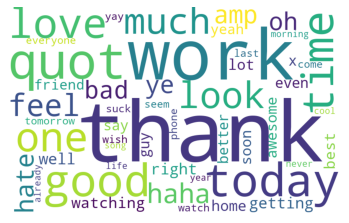

In [24]:
# Plot word cloud
words = "".join(df['clean text'])
wordcloud = WordCloud(height=500, width=800, max_font_size=200, max_words=50, background_color="white").generate(words)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()